In [ ]:
# ✅ Step 1: Load Dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
print(X[:5])
print(y[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


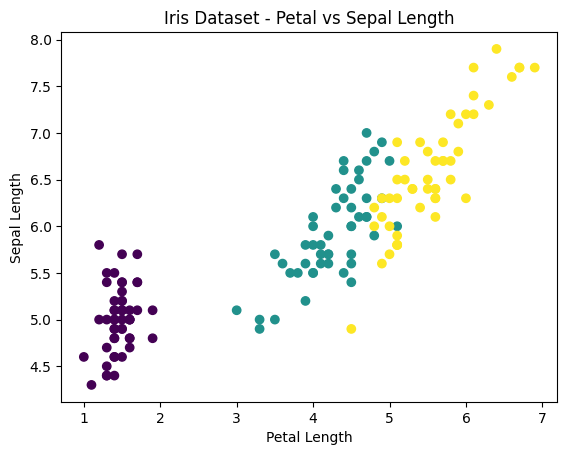

In [ ]:
# ✅ Step 2: Visualize the Data
import matplotlib.pyplot as plt

plt.scatter(X[:, 2], X[:, 0], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.title("Iris Dataset - Petal vs Sepal Length")
plt.show()


In [ ]:
# ✅ Step 3: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)


In [ ]:
# ✅ Step 4: Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

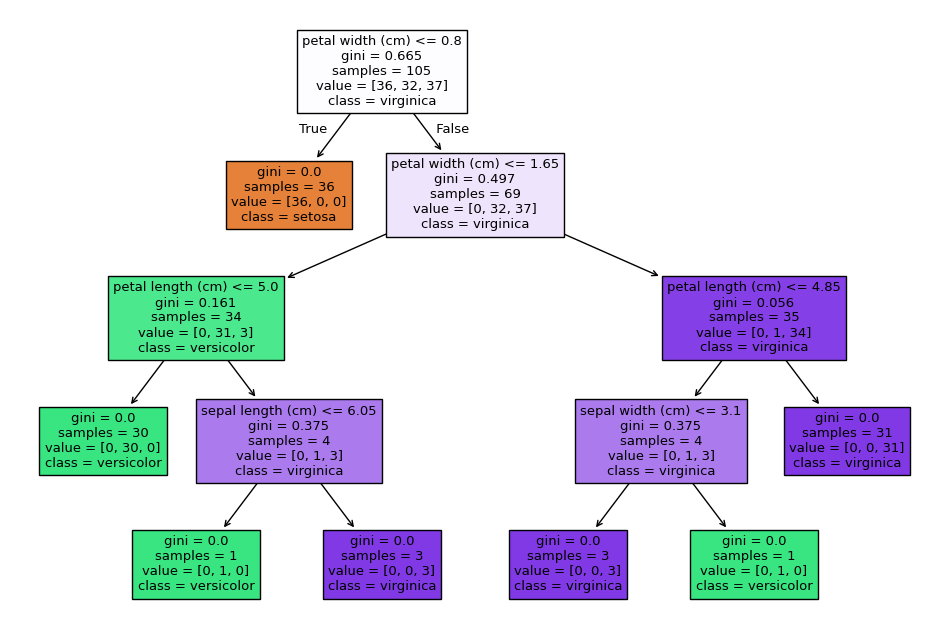

In [ ]:
# ✅ Step 5: Visualize the Tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(
    classifier,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names
)
plt.show()


In [ ]:
# ✅ Step 6: Make Predictions
y_pred = classifier.predict(X_test)

print("Predictions:", y_pred)
print("Actual:     ", y_test)


Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
Actual:      [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [ ]:
# ✅ Step 7: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9555555555555556
Confusion Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini.fit(X_train, y_train)

# Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy.fit(X_train, y_train)

# Accuracy Comparison
acc_gini = accuracy_score(y_test, clf_gini.predict(X_test))
acc_entropy = accuracy_score(y_test, clf_entropy.predict(X_test))

print("Accuracy with Gini:", acc_gini)
print("Accuracy with Entropy:", acc_entropy)


Accuracy with Gini: 0.9555555555555556
Accuracy with Entropy: 0.9555555555555556


Depth: 1, Accuracy: 0.6000
Depth: 2, Accuracy: 0.9556
Depth: 3, Accuracy: 0.9556
Depth: 4, Accuracy: 0.9556
Depth: 5, Accuracy: 0.9556
Depth: 6, Accuracy: 0.9556
Depth: 7, Accuracy: 0.9556
Depth: 8, Accuracy: 0.9556
Depth: 9, Accuracy: 0.9556
Depth: 10, Accuracy: 0.9556


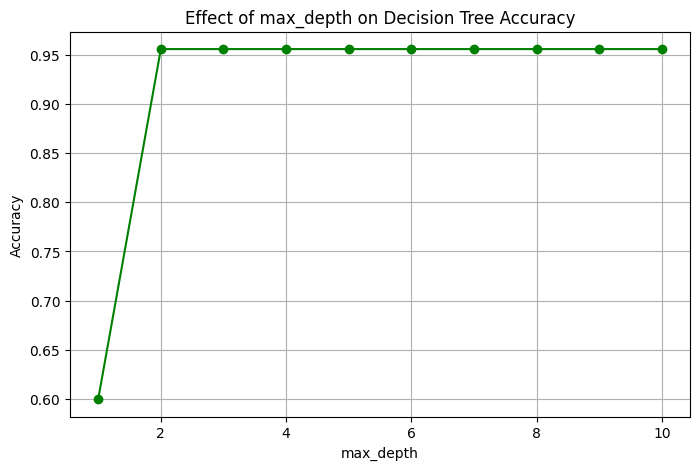

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load the dataset (assuming iris is not globally available)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

depths = list(range(1, 11))  # Test depths from 1 to 10
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Depth: {depth}, Accuracy: {acc:.4f}")

# Plotting the effect of max_depth on accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='green')
plt.title("Effect of max_depth on Decision Tree Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()